## PROJET MACHINE LEARNING MJ2 ML YNOV : HOME CREDIT SCORING



<center><h3> *** Développer un modèle de scoring de la probabilité de défaut de paiement des clients de MLBank   *** </h3></center>

Home Credit Default Risk dataset : https://www.kaggle.com/c/home-credit-default-risk/data

Can you predict how capable each applicant is of repaying a loan?

10 files and 346 columns

### Introduction :
Dans ce projet, nous analyserons les facteurs qui influent sur la capacité d'un individu à rembourser un prêt ou non. Nous explorerons plusieurs techniques statistiques afin de trouver de meilleures façons d'analyser les données et de permettre à notre modèle de tirer des enseignements de ces techniques statistiques de manière plus efficace. Tout d'abord, nous nous concentrerons sur l'analyse exploratoire des données (EDA), car nous souhaitons mieux comprendre ce que les données nous disent, puis nous déterminerons si l'ensemble de données est fortement déséquilibré et nous utiliserons plusieurs techniques pour traiter ces types d'ensembles de données 

This project est découpée en 3 phases :

###  L'Analyse Exploratoire des données (EDA) :

Il y a une grande quantité de données, donc dans cette phase, nous prenons un certain temps pour approfondir toutes les caractéristiques que nous considérons comme importantes.

### Preprocessing the Data: 

C'est l'aspect le plus important de la précision de nos modèles. Il est essentiel d'utiliser les bonnes techniques pour mettre à l'échelle et transformer certaines des valeurs manquantes.

### Implementation of the Model: 
Nous Déciderons quel modèle prédictif fonctionnera le mieux dans ce scénario.


#### import librairies 

In [67]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline as make_pipeline_imb 
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from collections import Counter

# Exploratory Data Analysis


#### loading datasets

In [68]:
app_train = pd.read_csv('./application_train.csv')
app_test = pd.read_csv('./application_test.csv')

In [69]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
app_test.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [72]:
app_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [73]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [74]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [75]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [76]:
app_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


#### Comment se répartissent les valeurs à prédire ('TARGET')

<AxesSubplot:ylabel='Frequency'>

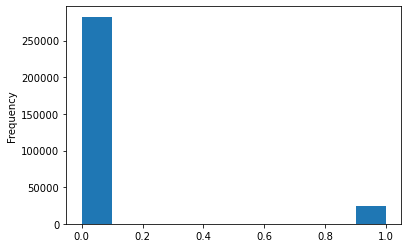

In [77]:

app_train['TARGET'].astype(int).plot.hist()

In [78]:
app_train['TARGET'].value_counts(normalize=1)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

#### Commbiens de valeurs manquantes et dans quelles variables ?

In [79]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [80]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [81]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

#### Quelles types de variables ?

In [82]:
#Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

#### Transformation de toutes les variables catégorielle en variable discrètes bouléeenne 

In [83]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 246)
Testing Features shape:  (48744, 242)


#### Assignation des variables X (entrée) et y (cible) que nous utiliseront pour le modèle de machine learning 


In [84]:
X=app_train

In [85]:
X.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.003941,0.030090,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.062656,0.170835,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
y = app_train['TARGET']

#### Gestion des anomalies

In [87]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


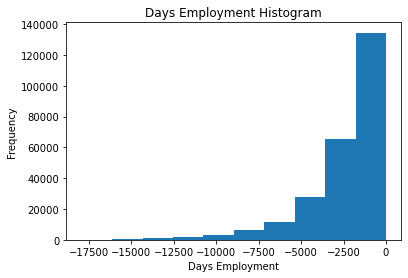

In [88]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

#### Visualisations de certaines variables

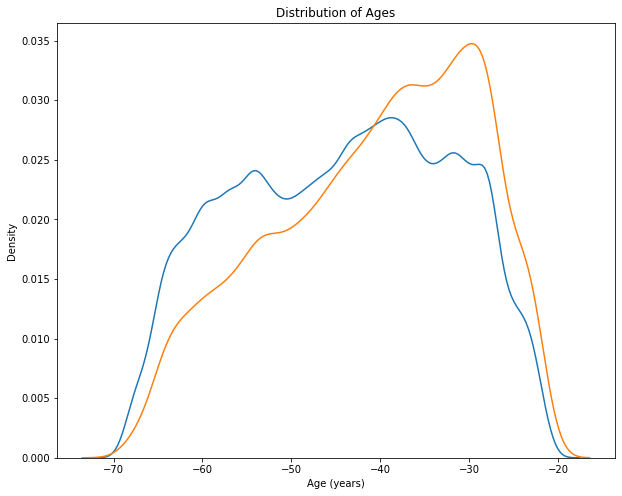

In [89]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');



In [90]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982692

In [91]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [92]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


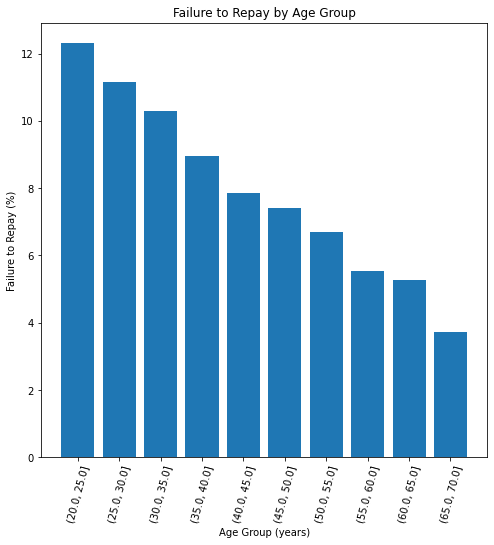

In [93]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

## Correlations

In [94]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

In [95]:
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

### Autres visualisations

In [96]:
app_train['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [97]:
(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean        -43.936973
std          11.956133
min         -69.120548
25%         -53.923288
50%         -43.150685
75%         -34.008219
max         -20.517808
Name: DAYS_BIRTH, dtype: float64

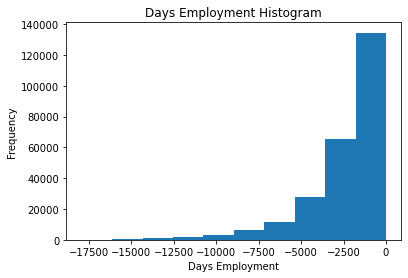

In [98]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [99]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [100]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.07% of loans
The anomalies default on nan% of loans
There are 0 anomalous days of employment


In [101]:
# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
# app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 243)


## Data Preprocessing 

In [102]:
X=app_train

#### Séparation des jeux de données : 1 pour l'entrainement, l'autre pour le test du modèle

In [103]:
X_train, X_test, y_train, y_test = train_test_split (X,y,stratify=y,test_size=0.25,random_state=42)

In [104]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#### Mise à l'échelle des données 

In [105]:
#Feature names
#features = list (X.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data and testing data
imputer.fit(X)
imputer.fit(X_train)
imputer.fit(X_test)

# Transform both training and testing data
X = imputer.transform(X)
test = imputer.transform(app_test)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Repeat with the scaler
scaler.fit(X)
X = scaler.transform(X)
test = scaler.transform(test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Training data shape: ', X.shape)
print('Testing data shape: ', test.shape)
print('train_labels',y.shape)
print('X_train',X_train.shape)
print('X_test',X_test.shape)


Training data shape:  (307511, 243)
Testing data shape:  (48744, 243)
train_labels (307511,)
X_train (230633, 243)
X_test (76878, 243)


#### Traiter les données déséquilibrées de la cible

Le jeu de données de la variable y est fortement déséquilibré. Il faut "redresesser" ce déséquilibre.

In [140]:
y.value_counts(normalize=1)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [106]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (230633, 243)
Number transactions y_train dataset:  (230633,)
Number transactions X_test dataset:  (76878, 243)
Number transactions y_test dataset:  (76878,)


In [107]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 18619
Before OverSampling, counts of label '0': 212014 



## Logistic Regression

#### Sans équilibrage des données

In [108]:
from sklearn.linear_model import LogisticRegression
log_reg1 = LogisticRegression (C = 0.0001)
log_reg1.fit(X_train, y_train)
y_pred1 = log_reg1.predict (X_test)
conf_matrix1 = confusion_matrix(y_test, y_pred1)

In [109]:
conf_matrix1

array([[70672,     0],
       [ 6206,     0]])

Remarque : le modèle a fait du sur-apprentissage, il ne fait aucune prédiction de mauvais remboursement, à cause du déséquilibre dans les données

#### Avec équilibrage des données

In [110]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote==0)))

After OverSampling, the shape of train_X: (424028, 243)
After OverSampling, the shape of train_y: (424028,) 

After OverSampling, counts of label '1': 212014
After OverSampling, counts of label '0': 212014


In [111]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.0001)

In [112]:
y_pred = log_reg.predict (X_test)

In [113]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = conf_matrix[0,0],conf_matrix[0,1],conf_matrix[1,0], conf_matrix[1,1]

print('''
TN : {} | FP : {}
-------------------------
FN : {} | TP : {}'''.format(TN, FP, FN, TP))


TN : 47122 | FP : 23550
-------------------------
FN : 2195 | TP : 4011


In [114]:
from sklearn import metrics
metrics.confusion_matrix (y_test,y_pred)


array([[47122, 23550],
       [ 2195,  4011]])

In [ ]:
Remarque : les résultats sont bien meilleurs, le modèles prédit de meill

In [115]:
ACC = round((TP + TN) /(TP+TN+FP+FN),6)
precision = round(TP / (TP + FP),2)
recall = round(TP / (TP + FN),2)
f1 = round(2 / ((1/recall)+(1/precision)),2)
MCC = round (((TP*TN)-(FP*FN))/pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5),2)
print ('ACC: {} Precision: {} Recall: {} F1: {} MCC: {}'.format(ACC,precision,recall,f1,MCC))

ACC: 0.665119 Precision: 0.15 Recall: 0.65 F1: 0.24 MCC: 0.18


#### Construction du fichier contenant les probabilités de mauvais remboursement

Maintenant que le modèle a été formé, nous pouvons l'utiliser pour faire des prédictions. Nous voulons prédire les probabilités de ne pas payer un prêt, c'est pourquoi nous utilisons la méthode du modèle predict.proba. Cela donne un tableau m x 2 où m est le nombre d'observations. La première colonne est la probabilité que la cible soit 0 et la deuxième colonne est la probabilité que la cible soit 1 (donc pour une seule ligne, les deux colonnes doivent s'additionner à 1). Nous voulons connaître la probabilité que le prêt ne soit pas remboursé, nous allons donc sélectionner la deuxième colonne.

Le code suivant fait les prédictions et sélectionne la colonne correcte.

In [116]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)

In [117]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred[:, 1]
submit.head(10)

,SK_ID_CURR,TARGET
0,100001,0.515699
1,100005,0.802284
2,100013,0.434231
3,100028,0.560723
4,100038,0.719134
5,100042,0.332989
6,100057,0.496648
7,100065,0.585663
8,100066,0.321991
9,100067,0.518806


In [118]:
# Les prévisions représentent une probabilité entre 0 et 1 que le prêt ne soit pas remboursé. Si nous utilisions ces prédictions pour classer les demandeurs, nous pourrions fixer un seuil de probabilité pour déterminer qu'un prêt est risqué.
### Save the submission to a csv file
submit.to_csv('log_reg_baseline_smote.csv', index = False)

#### Calcul de la courbe de roc pour mesurer la performance du modèle

ROC AUC Score: 0.7154326043300461
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.67      0.79     70672
           1       0.15      0.65      0.24      6206

    accuracy                           0.67     76878
   macro avg       0.55      0.66      0.51     76878
weighted avg       0.89      0.67      0.74     76878

Confusion matrix:
 [[47122 23550]
 [ 2195  4011]]


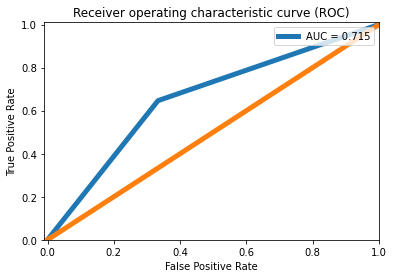

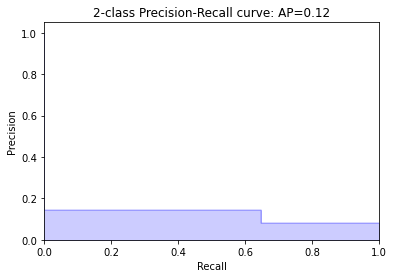

In [119]:
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predicted = y_pred
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = log_reg.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

Plus l'aire sous la courbe est importante moins le modèle fait d'erreur. Plus elle est élevée plus le modèle est meilleur pour prédire les 0 comme 0 et les 1 comme les 1.
Le résultat AUC nous indique que le modèle à 71,5 % de chance que le modèle soit capable de faire la distinction entre la classe positive et négative 

### Random Forest

Pour essayer de battre les performances de la régression logistique, essayons d'utiliser une forêt aléatoire sur les mêmes données d'entraînement pour voir comment cela affecte les performances. Le Random Forest est un modèle beaucoup plus puissant, surtout lorsque nous utilisons des centaines d'arbres. Nous utiliserons 100 arbres dans la forêt aléatoire

In [120]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [122]:
# Train on the training data
random_forest.fit(X_train_smote, y_train_smote)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
#feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   53.9s finished


In [123]:
y_pred_rf = random_forest.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.0s finished


In [124]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_test,y_pred_rf)
print(classification_report(y_test,y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70672
           1       0.30      0.01      0.02      6206

    accuracy                           0.92     76878
   macro avg       0.61      0.50      0.49     76878
weighted avg       0.87      0.92      0.88     76878

0.9179349098571763


In [125]:
TN, FP, FN, TP = conf_matrix[0,0],conf_matrix[0,1],conf_matrix[1,0], conf_matrix[1,1]

print('''
TN : {} | FP : {}
-------------------------
FN : {} | TP : {}'''.format(TN, FP, FN, TP))

#Confusion matrix:AUC
# [[46975 23697]
# [ 2182  4024]]


TN : 70492 | FP : 180
-------------------------
FN : 6129 | TP : 77


In [126]:
ACC = round((TP + TN) /(TP+TN+FP+FN),2)
precision = round(TP / (TP + FP),2)
recall = round(TP / (TP + FN),2)
f1 = round(2 / ((1/recall)+(1/precision)),2)
MCC = round (((TP*TN)-(FP*FN))/pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5),2)
print ('ACC: {} Precision: {} Recall: {} F1: {} MCC: {}'.format(ACC,precision,recall,f1,MCC))

ACC: 0.92 Precision: 0.3 Recall: 0.01 F1: 0.02 MCC: 0.05


In [127]:
from sklearn.metrics import roc_auc_score
probas = random_forest.predict_proba(X_test)
roc_auc_score (y_test,probas[:, 1])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.0s finished


0.6966172280748706

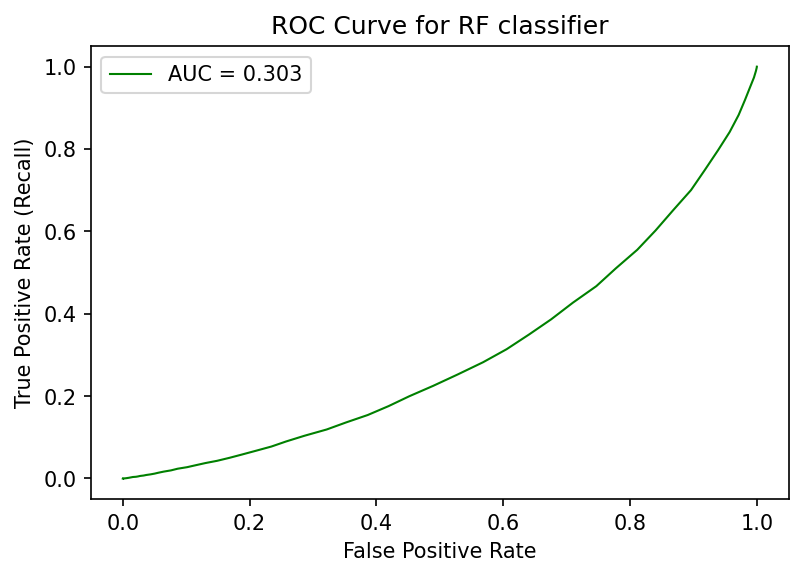

In [147]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,1], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [ ]:
Remarque : Le modèle Random Forest ne sait pas prédire correctement.

# Calcum du coût économique des mauvaises préditions
##### notre modèle de régression logistique : à une précision à 66%, le pourcentage de clients ne remboursant pas leur prêt est de 8%. Compte tenu de cette situation quelle serait le cout de mauvaise prédiction de notre modèle sur une population de 500.000 clients

In [148]:
def calculate_wrong_pred (acc:float=0.664078,subpop:float=0.080729,population:float=500000):

    tp = np.rint(population*subpop*acc).astype(int)
    fp = np.rint(population*(1-acc)).astype(int)
    fn = np.rint(population*subpop).astype(int) - tp
    tn = np.rint(population*(1-subpop)*acc).astype(int)
    
    return (tp,fp,fn,tn)

In [149]:
tp,fp,fn,tn = calculate_wrong_pred ()

In [150]:
average_loan = round(app_train['AMT_CREDIT'].mean()/1000)
total_loan = round(app_train['AMT_CREDIT'].sum()/1000000)
print ("average_loan (000) ",average_loan)
print ("total_loan (000.000) ",total_loan)

average_loan (000)  599
total_loan (000.000)  184207


Lorsque notre modèle prédit des faux positif (bon emprunteur prédit en tant que mauvais emprunteur) . Le coût de cette mauvaise prédiction pour 500.000 client est un manque à gagner 100 millions en prêt ce qui réprésente 0,05% du montant total des prêt consédés.

In [151]:
miss_loan_amount = average_loan * fp / 1000000
print ("total_miss_loan_amount (000.000)",miss_loan_amount)
print ("total_miss_loan_amount / total_loan (%) ",round(miss_loan_amount/total_loan*100,4))

total_miss_loan_amount (000.000) 100.608639
total_miss_loan_amount / total_loan (%)  0.0546


In [152]:
loan_loss = average_loan * 0.5 

In [153]:
tot_loss = loan_loss * fn/ 1000000
print ("total_loan_loss (000.000)", tot_loss)
print ("total_loan_loss / total_loan (%)", round((tot_loss/total_loan)*100,4))

total_loan_loss (000.000) 4.0609205
total_loan_loss / total_loan (%) 0.0022


Lorsque notre modèle prédit des faux négatifs (mauvais emprunteur prédit en tant que bon emprunteur). Le coût de cette mauvaise prédiction pour 500.000 client est un perte de 4 millions en prêt ce qui réprésente 0,002 % du montant total des prêt consédés.

##### Conclusion : Le coût économique des mauvaise prédictions est négligeable. Les performances du modèle de régression logistique sont donc satisfaisante.

### Autres méthodes pour augmenter les données

In [ ]:
print('Classifcation report: RandomUnderSampler \n', classification_report(y_test, y_rus))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_rus))
print('*'*25)

print('Classifcation report: RandomOverSampler \n', classification_report(y_test, y_ros))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_ros))
print('*'*25)

print('Classifcation report: Smote \n', classification_report(y_test, y_smote))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_smote))
print('*'*25)

print('Classifcation report: Blsmote \n', classification_report(y_test, y_blsmote))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_blsmote))
print('*'*25)